# DAT301 Final Project Fall 2022
**Authors: Amber Kahklen (akahklen, 1216918261), Shaira Alam (salam13, 1216475247), Alyssa Stefencavage (astefenc, 1213852690)**

### Dataset and Information
**Income Prediction Based on Census Data** <br>

UCI's Machine learning Repository, Adult Data Set: <a href="https://archive.ics.uci.edu/ml/datasets/Adult">https://archive.ics.uci.edu/ml/datasets/Adult</a> <br>

- The dataset provides census information in relation to if income is above or below $50,000 a year
- The data extration was done by Berry Becker and was taken from the 1994 census database
- Due to the fact that the dataset is from 1994 the data unfortunetely does not take into account inflation up until the current year

### Information on Data

**age**: continuous.

**workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov,    Without-pay, Never-worked.
            
**fnlwgt**: continuous. 
- The number of people one row represents

**education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 
            7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
            
**education-num**: continuous.

**marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, 
                Married-spouse-absent, Married-AF-spouse.
- Married-civ-spouse: Married to a civilian
- Married-AF-spouse: Married to someone in the Armed Forces
                
**occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, 
            Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving,             Priv-house-serv, Protective-serv, Armed-Forces.
            
**relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

**race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

**sex**: Female, Male.

**capital-gain**: continuous

**capital-loss**: continuous

**hours-per-week**: continuous.

**native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, 
                  Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran,                       Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,                         Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,                      Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador,                       Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### Motivation

- To gain a perspective on the different impacts of various categories on the amount of money people make
- To help us understand possible things that could affect our wage and possible things to avoid that could hinder us

### Setup

In [83]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


df = pd.read_csv("adultdata.csv")

#These next two lines get rid of any null or NaN values
df.replace(' ?', None, inplace = True)
df = df.dropna()
df.columns = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", 
                      "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", 
                      "wage_below_orAbove_50k"]

#BLELOW HERE FOR SETUP is all transforming string values into int values for the Linear Regression
df_allnums = df

df_allnums.columns = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", 
                      "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", 
                      "wage_below_orAbove_50k"]

df_allnums.workclass.replace((' Private', ' Self-emp-not-inc', ' Self-emp-inc', ' Federal-gov', ' Local-gov', ' State-gov', 
                              ' Without-pay', ' Never-worked'), (1, 2, 3, 4, 5, 6, 7, 8), inplace = True)

df_allnums.marital_status.replace((' Married-civ-spouse', ' Divorced', ' Never-married', ' Separated', ' Widowed', 
                                   ' Married-spouse-absent', ' Married-AF-spouse'), (1, 2, 3, 4, 5, 6, 7), inplace = True)

df_allnums.occupation.replace((' Tech-support', ' Craft-repair', ' Other-service', ' Sales', ' Exec-managerial', 
                               ' Prof-specialty', ' Handlers-cleaners', ' Machine-op-inspct', ' Adm-clerical', 
                               ' Farming-fishing', ' Transport-moving', ' Priv-house-serv', ' Protective-serv', 
                               ' Armed-Forces'), (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14), inplace = True)

df_allnums.relationship.replace((' Wife', ' Own-child', ' Husband', ' Not-in-family', ' Other-relative', ' Unmarried'), 
                                (1, 2, 3, 4, 5, 6), inplace = True)

df_allnums.race.replace((' White', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other', ' Black'), (1, 2, 3, 4, 5), 
                        inplace = True)

df_allnums.sex.replace((' Female', ' Male'), (1, 2), inplace = True)

df_allnums.native_country.replace((' United-States',' Cambodia',' England',' Puerto-Rico',' Canada',' Germany',
                                   ' Outlying-US(Guam-USVI-etc)',' India',' Japan',' Greece',' South',' China',' Cuba',
                                   ' Iran',' Honduras',' Philippines',' Italy',' Poland',' Jamaica',' Vietnam',' Mexico',
                                   ' Portugal',' Ireland',' France',' Dominican-Republic',' Laos',' Ecuador',' Taiwan',
                                   ' Haiti',' Columbia',' Hungary',' Guatemala',' Nicaragua',' Scotland',' Thailand',
                                   ' Yugoslavia',' El-Salvador',' Trinadad&Tobago',' Peru',' Hong',' Holand-Netherlands'), 
                                  (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,
                                   34,35,36,37,38,39,40,41), inplace = True)

df_allnums.wage_below_orAbove_50k.replace((' <=50K', ' >50K'), (0, 1), inplace = True)

### Linear Regression

In [84]:
x = df_allnums.loc[:, ["age", "workclass", "fnlwgt", "education_num", "marital_status", "occupation", "relationship", 
                       "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country"]]
y = df_allnums.wage_below_orAbove_50k

#splits data 25% test sets and 75% training sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)

linearR = LinearRegression()
linearR.fit(xtrain, ytrain)
yPrediction = linearR.predict(xtest)

r2Score = r2_score(ytest, yPrediction)
mse = mean_squared_error(ytest, yPrediction)

df_label = df_allnums

**R2 Score**

In [85]:
print(r2Score)

0.29447697720536437


**Mean Squared Error**

In [86]:
print(mse)

0.1286951830893958


### Analysis of Linear Regression

**R2 Score**
- The r2 score demonstrates the percentage of variance that can be seen in the dependent variable. Typically a r2 value is based on a scale from 0 to 100, 0 stating that there is no reasoning for the variation while 100 states that there is compelete reasoning for the variation.
- The above model has a r2 score of 0.2945 or 29.45%. This r2 score is not bad in regards to the model and can show a loose correlation between the observed variables and the models predictions.

**Mean Squared Error**
- The mean squared error is the average of the square of the errors. With a mean squared error you want a lower number as a higher number indicates high error.
- As can be seen above the mean squared error for the linear regression is very low at 0.1287. As this value is very low it shows that there is very little error between the predicted values and the observed ones.

### 1. How many people are there for each education category? 

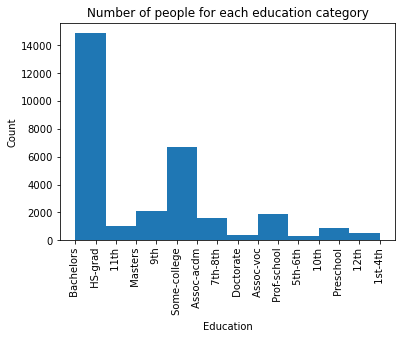

In [87]:
y = df.education

plt.hist(y)
plt.xlabel("Education")
plt.ylabel("Count")
plt.title("Number of people for each education category")
plt.xticks(rotation='vertical')
plt.show()

As seen in this dataset, most individuals are those with a Bachelors degree. This sets up a standard for what type of data we are going to be analyzing in the following as they have some form of higher, post-secondary school, education. 

### 2. How many people make above or below 50k? 

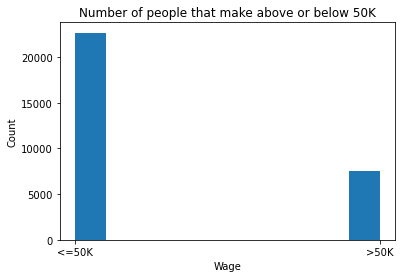

In [89]:
df_label.wage_below_orAbove_50k.replace((0, 1), ('<=50K', '>50K'), inplace = True)

y = df.wage_below_orAbove_50k

plt.hist(y)
plt.xlabel("Wage")
plt.ylabel("Count")
plt.title("Number of people that make above or below 50K")
plt.show()

In this data category, most indiivduals make less than $50,000 per year. 

### 3. Number of people per occupation

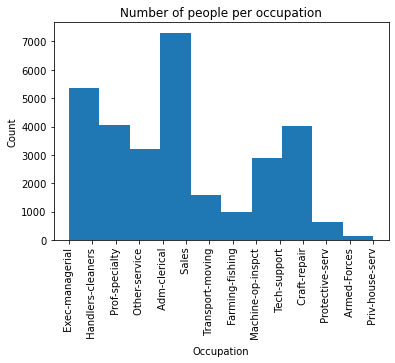

In [90]:
df.occupation.replace((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14), (' Tech-support', ' Craft-repair', ' Other-service', 
                               ' Sales', ' Exec-managerial', ' Prof-specialty', ' Handlers-cleaners', ' Machine-op-inspct', 
                               ' Adm-clerical', ' Farming-fishing', ' Transport-moving', ' Priv-house-serv', ' Protective-serv', 
                               ' Armed-Forces'), inplace = True)
y = df.occupation

plt.hist(y)
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.title("Number of people per occupation")
plt.xticks(rotation='vertical')
plt.show()

As can be seen in the above graph there is a high number of people, around 7000, that work in sales as well as adm-clerical.

### 4. What is the average age per workclass? 

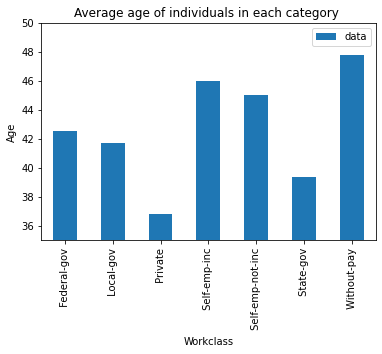

In [91]:
df_label.workclass.replace((1, 2, 3, 4, 5, 6, 7, 8), (' Private', ' Self-emp-not-inc', ' Self-emp-inc', ' Federal-gov', 
                                                      ' Local-gov', ' State-gov', ' Without-pay', ' Never-worked'), 
                                                       inplace = True)

df_age = pd.DataFrame({"data": df_label.age, "Category": df_label.workclass})
mean = df_age.groupby("Category").mean()

mean.plot.bar(ylim=(35,50))
plt.xlabel("Workclass")
plt.ylabel("Age")
plt.title("Average age of individuals in each category ")
plt.show()

Considering the current data, those without-pay have the highest average age. The next workclass is the self-emp-inc. Interestingly, the youngest average age is within the private workclass. 

### 5.  What is the martial status of people making over 50k

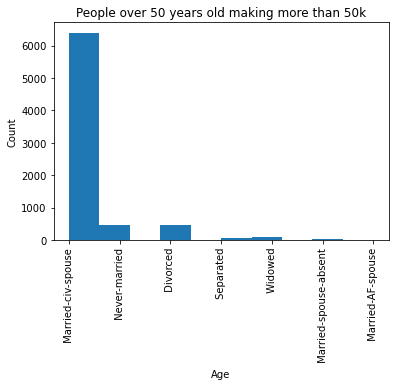

In [96]:
df_age = df.marital_status.replace((1, 2, 3, 4, 5, 6, 7),(' Married-civ-spouse', ' Divorced', ' Never-married', 
                                                                  ' Separated', ' Widowed', ' Married-spouse-absent', 
                                                                  ' Married-AF-spouse'), inplace = True)
df.wage_below_orAbove_50k.replace((0, 1), ('<=50K', '>50K'), inplace = True)
df_age = df[df.eval("wage_below_orAbove_50k.str.startswith('>').values")]
plt.hist(df_age.marital_status)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("People over 50 years old making more than 50k")
plt.xticks(rotation='vertical')
plt.show()

Most older individuals that are making over $50,000 tend to be married or have civilian spouses. This is a good indicator about the population's financial stability comes in - especially in the safety net of a possible dual income household. 

### 6.  How many with High School Education make more than 50k

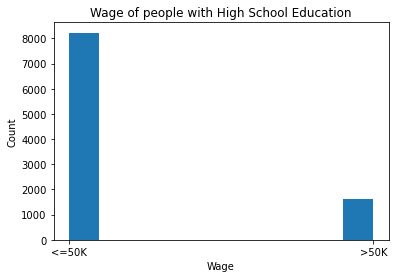

In [97]:
df_edu = df[df.eval("education.str.contains('HS').values")]
plt.hist(df_edu.wage_below_orAbove_50k)
plt.xlabel("Wage")
plt.ylabel("Count")
plt.title("Wage of people with High School Education")
plt.show()

Most ndividuals who have their highest level of education being a a high school education make less than $50,000. This is critical regarding the importance of higher educaiton and higher income. 

### 7. How many hours per week for people working at the government?

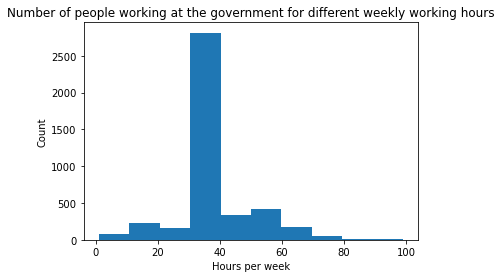

In [98]:
df_gov = df[df.eval("workclass.str.contains('gov').values")]
plt.hist(df_gov.hours_per_week)
plt.xlabel("Hours per week")
plt.ylabel("Count")
plt.title("Number of people working at the government for different weekly working hours")
plt.show()

Most people who are working in the government work approximately 40 hours/week. This makes sense with regard to legal restrictions and the more structured work government work may provide. 

### 8. What is the average hours per week worked for each education category? 

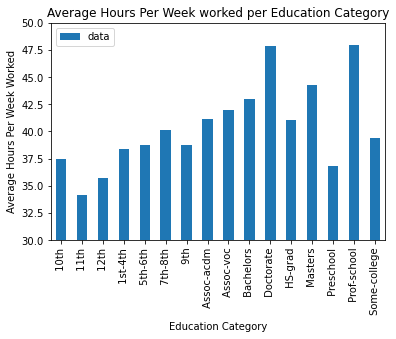

In [99]:
df_age = pd.DataFrame({"data": df.hours_per_week, "Category": df.education})
mean = df_age.groupby("Category").mean()

mean.plot.bar(ylim=(30,50))
plt.xlabel("Education Category")
plt.ylabel("Average Hours Per Week Worked")
plt.title("Average Hours Per Week worked per Education Category")
plt.show()

Individuals with the most hours worked per week are first professional school graduates and then doctorate degrees. 
This is interesting when you look at the type of work that comes out of those who graduate with that type of education. 
Professional school could offer a higher salary but in return one might have to work longer hours due to the amount of work those professions tend to have.

### Conclusion

Overall there were correlations in the data that indicated an increase in pay with a change in certain categories.

- The linear regression model showed that there was about a 29% correlation between the other variables and wage and the model had a very low mean squared error meaning there was not much error in it's predictions.
- Most individuals in the dataset held bachelors degrees but doctorate and professional school people worked the most hours per week.
- There are a little less than triple the number of people making less than 50,000 a year than there are people making more than 50,000 a year overall and probably about 1/5 the number of people making above 50,000 a year that have a high school diploma compared to those who make less than 50,000 a year with a high school diploma.
- The occupations with the highest number of people in the dataset are sales and adm-clerical.
- In regards to the average age in each work class the category with the oldest population is those without pay while the work class with the youngest population is private.
- Those who are over 50 years of age and married to a civilian spouse often make more than 50,000 a year
- it is often seen that people who work for the government work 30-40 hours a week

After the analysis performed on the data it is possible to come to the conclusion that making certain decisions can definitely increase your pay. Such decisions could be:

- Getting a higher level degree such as a bachelors or even doctorate or professional
- If working more hours is not desirable than getting a doctorate or professional degree might not be the correct path while a government position where the average is 30-40 hours a week might be more desirable.